In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, make_scorer, precision_score, recall_score, accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
%matplotlib inline

plt.rcParams['font.size'] = '12'
sns.set_theme(rc={'figure.figsize':(10,4)})

In [3]:
#A function has been created as below, to create and separate both orginal training / test data set in to correct format for ML process.
#Currently we use Lable 5 and 7 for this project, hence it can be passed into the function to pull the correct corresponding data.
#The first position of filtered list (Sandal -- 5, will be convert into label class 1, and 7 will be label class 0 )
def prepare_data (feature_file, label_file, filter_list):
    df_F = pd.read_csv(feature_file)
    df_L = pd.read_csv(label_file)
    df_F.columns = ["F"+str(i+1) for i in range(df_F.shape[1])]
    df_L.columns = ["Label"]
    df_all = pd.concat([df_L,df_F], axis=1)
    df_all=df_all[df_all['Label'].isin(filter_list)]
    df_all["Label"] = np.where (df_all.Label == filter_list[0], 1,0)
    df_F = df_all.iloc[:, 1:]
    df_L = df_all.iloc[:, 0]
    return df_all, df_F, df_L

In [4]:
train_all, train, train_L = prepare_data ('FMNIST_training_set.csv', 'FMNIST_training_set_labels.csv', [5,7])

In [5]:
test_all, test, test_L = prepare_data ('FMNIST_test_set.csv', 'FMNIST_test_set_labels.csv', [5,7])

In [6]:
#below shows how it should be like the project example, first 5 rows of 
train_all.iloc[:5,:25]

,Label,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F15,F16,F17,F18,F19,F20,F21,F22,F23,F24
11,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,53,102,144,169,149
40,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### D1 : Below is the code and summary statistics for question D1 

In [6]:
D1 = {' ' : ["# of instances in Training:","# of instances in Test    :", "Total # of instances      :"] ,
    'Total': [len(train), len(test), len(train)+len(test)]}
D1 = pd.DataFrame(D1)
print(D1.to_string(index=False))

                             Total
# of instances in Training:  11988
# of instances in Test    :   2000
Total # of instances      :  13988


In [277]:
D1 = {'Total': [len(train), len(test), len(train)+len(test)]}
D1 = pd.DataFrame(D1,index=["The number of instances in Training:","The number of instances in Test    :", "The total number of instances      :"])
D1

,Total
The number of instances in Training:,11988
The number of instances in Test :,2000
The total number of instances :,13988


#### D2 : Below is the bar plot, showing we are having a perfectly balanced training set.

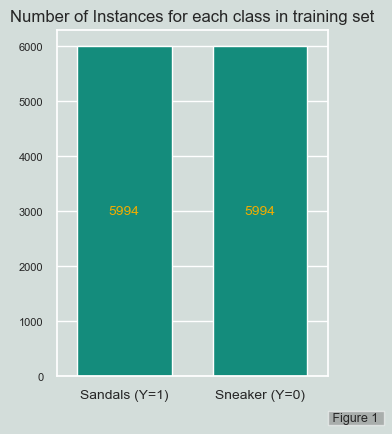

In [281]:
df = pd.DataFrame({'class': ['Sandals (Y=1)', 'Sneaker (Y=0)'],
                   'number of instances': [(train_all['Label']==1).sum(), (train_all['Label']==0).sum()]})
fig, ax = plt.subplots()
fig.set_size_inches(3.5, 4.5)
ax = sns.barplot(x='class', y='number of instances',
                 data=df,
                 color = '#00A08A',
                 #palette='#046C9A',
                 legend = False,
                 width = 0.7
                 )
ax.bar_label(ax.containers[0],label_type='center', color = '#F2AD00',fontsize=10)
fig.set_facecolor('#D3DDDA')
ax.set_facecolor('#D3DDDA')
plt.xlabel('', fontsize=15);
plt.ylabel('', fontsize=15);
plt.title('Number of Instances for each class in training set', fontsize=12)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 8)
plt.figtext(0.98, 0.01, " Figure 1 ", ha="center", fontsize=9, bbox={"facecolor":'#808080', "alpha":0.5, "pad":1})
plt.savefig('Fig 1.png', bbox_inches='tight')
plt.show()

#### D3 : Below is the code and plot, showing first 6 images of each Sandals(1) and Sneakers(0) class, with orginal example id listed.

In [42]:
D3_list = (train_all[train_all['Label'] == 1].index.tolist()[:6]) + (train_all[train_all['Label'] == 0].index.tolist()[:6])
D3_list = sorted(D3_list)
D3_list

[11, 29, 35, 40, 42, 51, 59, 62, 82, 86, 107, 125]

In [43]:
D3_array = train_all.loc[D3_list]
image = D3_array.to_numpy()

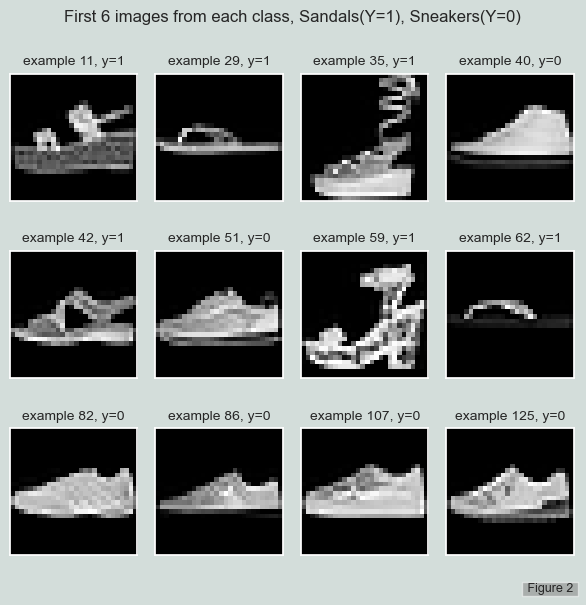

In [282]:
fig, axs = plt.subplots(3, 4, figsize=(6, 6))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(image[i][1:].reshape(28,28),interpolation = 'nearest',cmap='gray')
    ax.set_title(f'example {D3_list[i]}, y={image[i][0]}', fontsize=10)
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
fig.suptitle('First 6 images from each class, Sandals(Y=1), Sneakers(Y=0)', fontsize=12)
plt.tight_layout()
fig.set_facecolor('#D3DDDA')
plt.figtext(0.93, 0.01, " Figure 2 ", ha="center", fontsize=9, bbox={"facecolor":'#808080', "alpha":0.5, "pad":1})
plt.savefig('Fig 2.png', bbox_inches='tight')
plt.show()

#### D4 : Below is the implementation of my own logistic regression classfier, with class name : LogisticRegression_1


In [52]:
class LogisticRegression_1:
    def __init__(self, learning_rate=0.00001, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weight = None
        
    def sigmoid(self, z):
        z = np.clip(z, -709.78, 709.78)
        return 1 / (1 + np.exp(-z))
    
    def log_loss(self, y_true, y_pred):
        epsilon = 1e-6  # lapsmoothing, introducing epsilon to avoid divide by 0 problem
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss

    def fit(self, X, y):
        m, n = X.shape
        self.weight = np.random.rand(n+1).T
        X = np.column_stack((np.ones((m, 1)), X)) 
        loss = []
        for _ in range(self.num_iterations):
            y_pred = self.sigmoid(np.dot(X, self.weight))
            gradient =  np.dot(X.T, (y_pred - y))/m
            self.weight -= self.learning_rate * gradient
            loss.append(self.log_loss(y, y_pred))         
        return loss

    def predict_proba(self, X):
         m, n = X.shape
         X = np.column_stack((np.ones((m, 1)), X))  
         # if self.weight is None:
         #     raise Exception("Model not trained yet. Fit the model first.")
         return self.sigmoid(np.dot(X, self.weight))

    def predict(self, X, threshold=0.5):  
         probabilities = self.predict_proba(X)
         return (probabilities >= threshold).astype(int)

In [54]:
#Splitting into training and validation set for all following questions
X_train, X_val, y_train, y_val = train_test_split(
    train.to_numpy(), train_L.to_numpy(), test_size=0.2, random_state=5508
)

In [55]:
model_1 = LogisticRegression_1(learning_rate=0.01, num_iterations=10000)
cost_1 = model_1.fit(X_train, y_train)
model_2 = LogisticRegression_1(learning_rate=0.001, num_iterations=10000)
cost_2 = model_2.fit(X_train, y_train)
model_3 = LogisticRegression_1(learning_rate=0.0001, num_iterations=10000)
cost_3 = model_3.fit(X_train, y_train)
model_4 = LogisticRegression_1(learning_rate=0.00001, num_iterations=10000)
cost_4 = model_4.fit(X_train, y_train)

#### D4 : Figure 3 shows the effect of different learning rate in logistic gradient decent. 

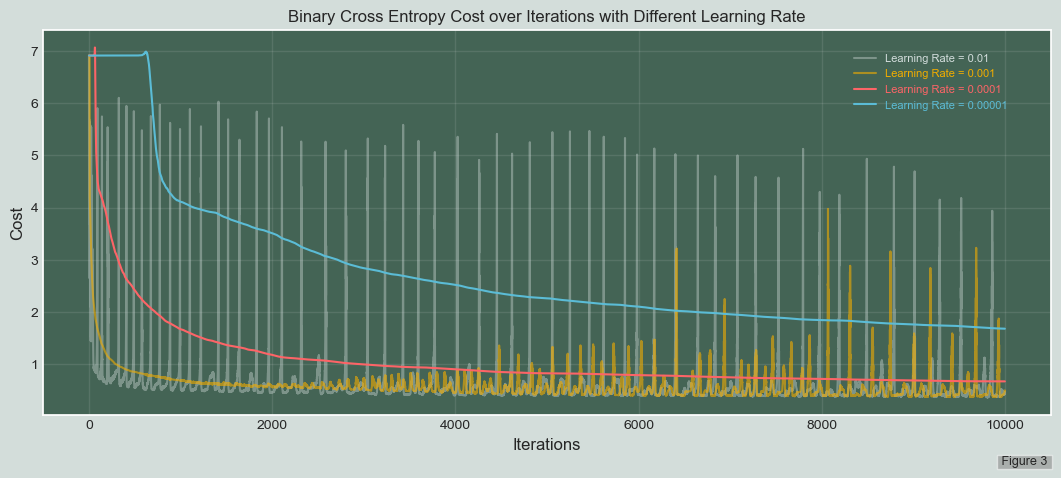

In [283]:
iterations = 10000
fig, ax = plt.subplots(figsize=(13, 5))
ax.plot(range(iterations), cost_1,label = "Learning Rate = 0.01",alpha=0.4, color = '#D3DDDC')
ax.plot(range(iterations), cost_2,label = "Learning Rate = 0.001",alpha=0.6, color = '#F2AD00')
ax.plot(range(iterations), cost_3,label = "Learning Rate = 0.0001", color = '#FD6467')
ax.plot(range(iterations), cost_4,label = "Learning Rate = 0.00001", color = '#5BBCD6')
ax.grid(visible=True, which='major', axis='both', alpha = 0.1)
ax.set_facecolor('#446455')
ax.tick_params(labelsize=10,direction='in')
fig.set_facecolor('#D3DDDA')
ax.legend(loc=(0.8, 0.78),labelcolor='linecolor', framealpha=0, fontsize=8) 
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.title.set_text('Binary Cross Entropy Cost over Iterations with Different Learning Rate')
plt.figtext(0.88, 0.01, " Figure 3 ", ha="center", fontsize=9, bbox={"facecolor":'#808080', "alpha":0.5, "pad":1})
plt.savefig('Fig 3.png', bbox_inches='tight')
plt.show()
#"#FF0000" "#00A08A" "#F2AD00" "#F98400" "#5BBCD6"

#### D5 : Below is the implementation of my own logistic regression classfier, with the added ability to track, record, in order to plot cost and mis classification rate, on both training and validation set.  Class name : LogisticRegression_2

In [68]:
class LogisticRegression_2:
    def __init__(self, learning_rate=0.00001, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weight = None

    def sigmoid(self, z):
        z = np.clip(z, -709.78, 709.78)
        return 1 / (1 + np.exp(-z))
    
    def log_loss(self, y_true, y_pred):
        epsilon = 1e-6 
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss

    def fit(self, X_t, y_t, X_v, y_v):
        self.training_costs = []
        self.valid_costs = []
        self.training_misfrac = []
        self.validation_misfrac = []
        m, n = X_t.shape
        self.weight = np.random.rand(n+1).T
        X_t = np.column_stack((np.ones((m, 1)), X_t)) 
        m_v,n_v = X_v.shape
        X_v = np.column_stack((np.ones((m_v, 1)), X_v))
        for _ in range(self.num_iterations):
            y_pred_t = self.sigmoid(np.dot(X_t, self.weight))
            self.training_costs.append (self.log_loss(y_t,y_pred_t))
            self.training_misfrac.append(np.mean((y_pred_t >= 0.5) != y_t))
            y_pred_v = self.sigmoid(np.dot(X_v, self.weight))
            self.valid_costs.append (self.log_loss(y_v,y_pred_v))
            self.validation_misfrac.append(np.mean((y_pred_v >= 0.5) != y_v))
            gradient = np.dot(X_t.T, (y_pred_t - y_t))/ m 
            self.weight -= self.learning_rate * gradient

    def predict_proba(self, X):
         m, n = X.shape
         X = np.column_stack((np.ones((m, 1)), X))  
         # if self.weight is None:
         #     raise Exception("Model not trained yet. Fit the model first.")
         return self.sigmoid(np.dot(X, self.weight))

    def predict(self, X_t, X_v, threshold=0.5):  
        probabilities_t = self.predict_proba(X_t)
        probabilities_v = self.predict_proba(X_v)
        return (probabilities_t >= threshold).astype(int),(probabilities_v >= threshold).astype(int)

In [87]:
model_5 = LogisticRegression_2(learning_rate=0.00001, num_iterations=10000)

In [88]:
model_5.fit(X_train, y_train,X_val, y_val)

#### D5 : Figure 4, the side by side plots with learning rate set to be = 0.00001. The left plot showing the cost (y-axis) for each iteration (x-axis) for the training and validation set. The right plot showing the fraction of misclassification (y-axis) for each iteration (x-axis). 

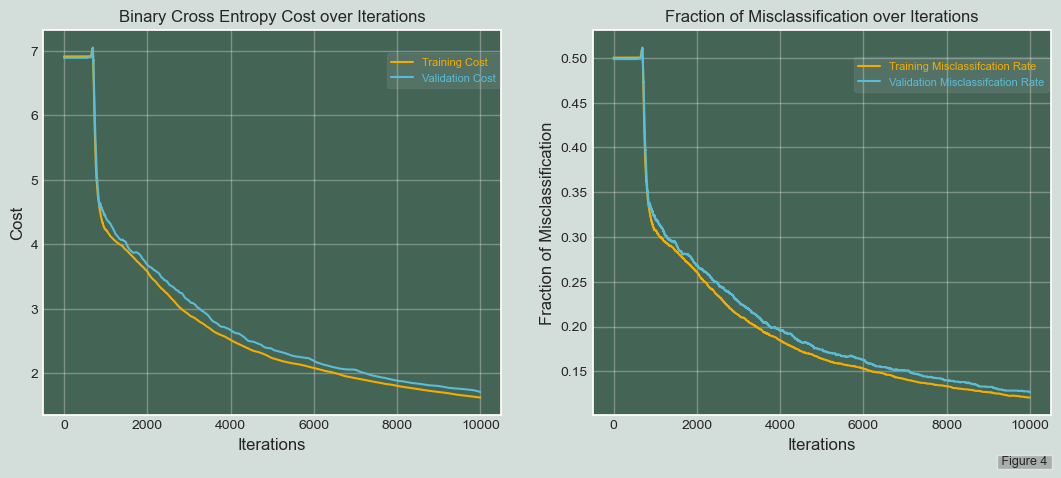

In [284]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(13, 5))
ax1.plot(range(model_5.num_iterations), model_5.training_costs, label='Training Cost', color = '#F2AD00')
ax1.plot(range(model_5.num_iterations), model_5.valid_costs, label='Validation Cost', color = '#5BBCD6')
ax1.title.set_text('Binary Cross Entropy Cost over Iterations')
ax1.set_facecolor('#446455')
ax1.tick_params(labelsize=10,direction='in')
ax1.grid(visible=True, which='major', axis='both', alpha = 0.3)
ax1.legend(loc=(0.75, 0.85),labelcolor='linecolor', framealpha=0.1, fontsize=8) 
ax2.plot(range(model_5.num_iterations), model_5.training_misfrac, label='Training Misclassifcation Rate', color = '#F2AD00')
ax2.plot(range(model_5.num_iterations), model_5.validation_misfrac, label='Validation Misclassifcation Rate', color = '#5BBCD6')
ax2.title.set_text('Fraction of Misclassification over Iterations')
ax2.set_facecolor('#446455')
ax2.tick_params(labelsize=10,direction='in')
ax2.grid(visible=True, which='major', axis='both', alpha = 0.3)
ax2.legend(loc=(0.57, 0.84),labelcolor='linecolor', framealpha=0.1, fontsize=8) 
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cost')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Fraction of Misclassification')
fig.set_facecolor('#D3DDDA')
plt.figtext(0.88, 0.01, " Figure 4 ", ha="center", fontsize=9, bbox={"facecolor":'#808080', "alpha":0.5, "pad":1})
plt.savefig('Fig 4.png', bbox_inches='tight')
plt.show()


#### D6  -   Conclusion : Both the costs of training and validation are showing decreases along with the increases of the iterations. However clearly the validation cost start to be constantly higher than the training cost, from around 1000 iteration mark. Meaning the model perform better on the traning set but not as good as on the validation set. The model may have overfitting issue with high variance. If we increase the bias, the model may generalize better. 

#### D7 : Figure 5, the side by side plots with L2 regularisation incorporated. The left plot showing the value of the cost function for each C value (x-axis) for the training and validation set, the right plot showing the misclassifcation (y-axis) for each C value (x-axis), by using a threshold of 0.5.

In [94]:
#Initialize C_grid as instructed
C_grid = np.logspace(-10, 5, 30)

In [338]:
class LogisticRegression_4:
    def __init__(self, learning_rate=0.00001, num_iterations=10000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weight = None
        self.loss = None

    def sigmoid(self, z):
        z = np.clip(z, -709.78, 709.78)
        return 1 / (1 + np.exp(-z))
    
    def log_loss(self, y_true, y_pred):  #once model is trained, use unregularized performace measure 
        epsilon = 1e-6
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss

    def fit(self, X_t, y_t, c):
        self.c = c
        m, n = X_t.shape
        self.weight = np.random.rand(n+1).T
        X_t = np.column_stack((np.ones((m, 1)), X_t)) 
        for _ in range(self.num_iterations):
            y_pred_t = self.sigmoid(np.dot(X_t, self.weight))
            #gradient = np.dot(X_t.T, (y_pred_t - y_t))  / m + (1/c)*self.weight
            gradient = c * np.dot(X_t.T, (y_pred_t - y_t))  + self.weight  
            #gradient = np.dot(X_t.T, (y_pred_t - y_t))  / m + (1/(c*10**5))*self.weight   # adding L2 to weights vector 
            #gradient = np.dot(X_t.T, (y_pred_t - y_t)) / m + c*self.weight   # adding L2 to weights vector 
            # gradient = np.dot(X_t.T, (y_pred_t - y_t)) / m + self.weight / (c*X_t.shape[0])  # adding L2 to weights vector 
            # gradient = np.dot(X_t.T, (y_pred_t - y_t)) / m + 1/c * self.weight *[0, *[1]*(len(self.weight)-1)]   # adding L2 to weights vector 
            #gradient = np.dot(X_t.T, (y_pred_t - y_t)) / m + 1/c*self.weight  # adding L2 to weights vector 
            self.weight -= self.learning_rate * gradient

    def predict_proba(self, X):
         m, n = X.shape
         X = np.column_stack((np.ones((m, 1)), X))  
         return self.sigmoid(np.dot(X, self.weight))

    def predict(self, X, threshold=0.5):  
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)

In [339]:
training_cost = []
validation_cost = []
y_t_frac = []
y_v_frac = []
for C in C_grid:
    model = LogisticRegression_4(learning_rate=0.0001, num_iterations=5000)
    model.fit(X_train, y_train,C)
    training_cost.append(model.log_loss(y_train, model.predict_proba(X_train)))
    validation_cost.append(model.log_loss(y_val, model.predict_proba(X_val)))
    y_pred_t= model.predict(X_train)
    y_pred_v= model.predict(X_val)
    y_t_frac.append(np.mean(y_pred_t != y_train))
    y_v_frac.append(np.mean(y_pred_v != y_val))

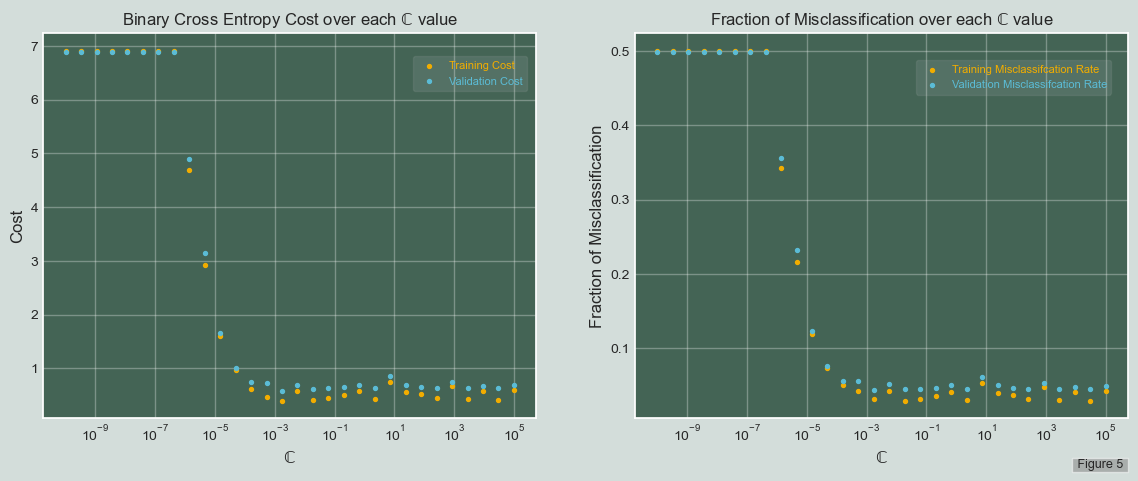

In [348]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14, 5))
ax1.scatter(C_grid,training_cost, s=8, label='Training Cost', color = '#F2AD00')
ax1.scatter(C_grid, validation_cost, s=8, label='Validation Cost',color = '#5BBCD6')
ax1.legend(loc='upper left')
ax1.set_xscale("log")
ax1.title.set_text('Binary Cross Entropy Cost over each ' + r'$\BbbC$' +' value' )
ax1.set_facecolor('#446455')
ax1.tick_params(labelsize=10,direction='in')
ax1.grid(visible=True, which='major', axis='both', alpha = 0.3)
ax1.legend(loc=(0.75, 0.85),labelcolor='linecolor', framealpha=0.1, fontsize=8) 
ax2.scatter(C_grid, y_t_frac, label='Training Misclassifcation Rate',s =8, color = '#F2AD00')
ax2.scatter(C_grid, y_v_frac, label='Validation Misclassifcation Rate',s = 8, color = '#5BBCD6')
ax2.legend(loc='upper left')
ax2.set_xscale("log")
ax2.title.set_text('Fraction of Misclassification over each ' + r'$\BbbC$' +' value')
ax2.set_facecolor('#446455')
ax2.tick_params(labelsize=10,direction='in')
ax2.grid(visible=True, which='major', axis='both', alpha = 0.3)
ax2.legend(loc=(0.57, 0.84),labelcolor='linecolor', framealpha=0.1, fontsize=8) 
ax1.set_xlabel(r'$\BbbC$')
ax1.set_ylabel('Cost')
ax2.set_xlabel(r'$\BbbC$')
ax2.set_ylabel('Fraction of Misclassification')
plt.figtext(0.88, 0.01, " Figure 5 ", ha="center", fontsize=9, bbox={"facecolor":'#808080', "alpha":0.5, "pad":1})
fig.set_facecolor('#D3DDDA')
# ax1.set_ylim([0,6])
# ax2.set_ylim([0,0.4])
# ax1.set_xlim([10**-8,10**6])
# ax2.set_xlim([10**-8,10**6])
plt.savefig('Fig 5.png', bbox_inches='tight')
plt.show()

In [98]:
class LogisticRegression_3:
    def __init__(self, learning_rate=0.001, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weight = None
        self.loss = None

    def sigmoid(self, z):
        z = np.clip(z, -709.78, 709.78)
        return 1 / (1 + np.exp(-z))
    
    def log_loss(self, y_true, y_pred):  #once model is trained, use unregularized performace measure 
        epsilon = 1e-6
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return loss

    def fit(self, X_t, y_t, alpha):
        self.alpha = alpha
        m, n = X_t.shape
        self.weight = np.random.rand(n+1).T
        X_t = np.column_stack((np.ones((m, 1)), X_t)) 
        for _ in range(self.num_iterations):
            y_pred_t = self.sigmoid(np.dot(X_t, self.weight))
            #gradient = np.dot(X_t.T, (y_pred_t - y_t))  / m + (1/(c*10**5))*self.weight   # adding L2 to weights vector 
            gradient = np.dot(X_t.T, (y_pred_t - y_t)) / m + alpha*self.weight  # adding L2 to weights vector 
            # gradient = np.dot(X_t.T, (y_pred_t - y_t)) / m + self.weight / (c*X_t.shape[0])  # adding L2 to weights vector 
            # gradient = np.dot(X_t.T, (y_pred_t - y_t)) / m + 2/c * self.weight *[0, *[1]*(len(self.weight)-1)]   # adding L2 to weights vector 
            # gradient = np.dot(X_t.T, (y_pred_t - y_t)) / m + c*self.weight  # adding L2 to weights vector 
            self.weight -= self.learning_rate * gradient

    def predict_proba(self, X):
         m, n = X.shape
         X = np.column_stack((np.ones((m, 1)), X))  
         return self.sigmoid(np.dot(X, self.weight))

    def predict(self, X, threshold=0.5):  
        probabilities = self.predict_proba(X)
        return (probabilities >= threshold).astype(int)      

In [99]:
###original code need re run original regression 3
training_cost_a = []
validation_cost_a = []
y_t_frac_a = []
y_v_frac_a = []
for alpha in C_grid:
    model = LogisticRegression_3(learning_rate=0.0001, num_iterations=5000)
    model.fit(X_train, y_train,alpha)
    training_cost_a.append(model.log_loss(y_train, model.predict_proba(X_train)))
    validation_cost_a.append(model.log_loss(y_val, model.predict_proba(X_val)))
    y_pred_t= model.predict(X_train)
    y_pred_v= model.predict(X_val)
    y_t_frac_a.append(np.mean(y_pred_t != y_train))
    y_v_frac_a.append(np.mean(y_pred_v != y_val))

C:\Users\coffe\AppData\Local\Temp\ipykernel_18156\2415556424.py:26: RuntimeWarning: overflow encountered in multiply
  gradient = np.dot(X_t.T, (y_pred_t - y_t)) / m + alpha*self.weight  # adding L2 to weights vector


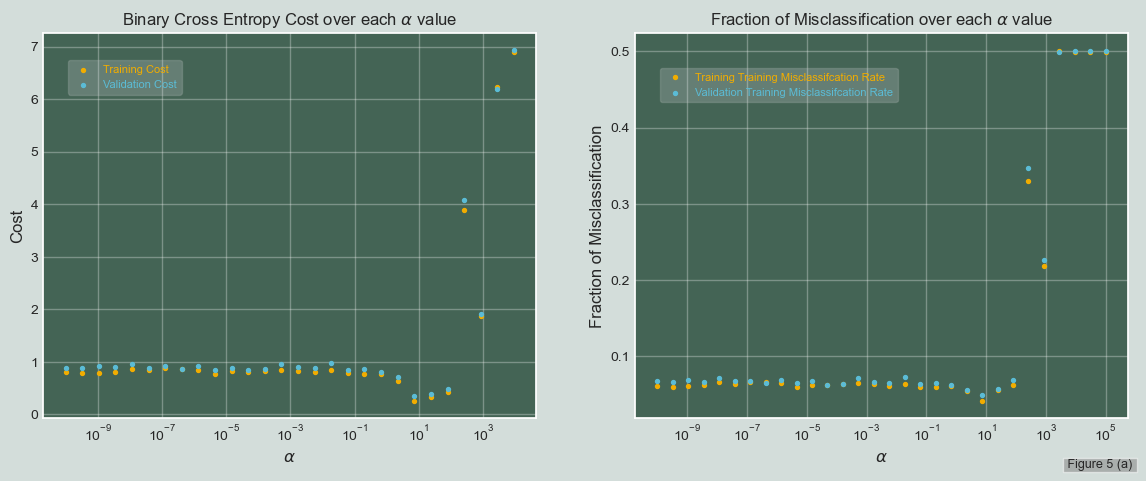

In [288]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(14, 5))
ax1.scatter(C_grid,training_cost_a, s=8,label='Training Cost', color = '#F2AD00')
ax1.scatter(C_grid, validation_cost_a, s=8,label='Validation Cost',color = '#5BBCD6')
ax1.legend(loc='upper left')
ax1.set_xscale("log")
ax1.title.set_text('Binary Cross Entropy Cost over each ' + r'$\alpha$' +' value' )
ax1.set_facecolor('#446455')
ax1.tick_params(labelsize=10,direction='in')
ax1.grid(visible=True, which='major', axis='both', alpha = 0.3)
ax1.legend(loc=(0.05, 0.84),labelcolor='linecolor', framealpha=0.2, fontsize=8) 
ax2.scatter(C_grid, y_t_frac_a, label='Training Training Misclassifcation Rate',s=8,color = '#F2AD00')
ax2.scatter(C_grid, y_v_frac_a, label='Validation Training Misclassifcation Rate',s=8,color = '#5BBCD6')
ax2.legend(loc='upper left')
ax2.set_xscale("log")
ax2.title.set_text('Fraction of Misclassification over each ' + r'$\alpha$' +' value')
ax2.set_facecolor('#446455')
ax2.tick_params(labelsize=10,direction='in')
ax2.grid(visible=True, which='major', axis='both', alpha = 0.3)
ax2.legend(loc=(0.05, 0.82),labelcolor='linecolor', framealpha=0.2, fontsize=8) 
ax1.set_xlabel(r'$\alpha$')
ax1.set_ylabel('Cost')
ax2.set_xlabel(r'$\alpha$')
ax2.set_ylabel('Fraction of Misclassification')
fig.set_facecolor('#D3DDDA')
plt.figtext(0.88, 0.01, " Figure 5 (a) ", ha="center", fontsize=9, bbox={"facecolor":'#808080', "alpha":0.5, "pad":1})
plt.savefig('Fig 5 (a).png', bbox_inches='tight')
plt.show()

In [1217]:
1/(C_grid*10**5)

array([1.00000000e+05, 3.03919538e+04, 9.23670857e+03, 2.80721620e+03,
       8.53167852e+02, 2.59294380e+02, 7.88046282e+01, 2.39502662e+01,
       7.27895384e+00, 2.21221629e+00, 6.72335754e-01, 2.04335972e-01,
       6.21016942e-02, 1.88739182e-02, 5.73615251e-03, 1.74332882e-03,
       5.29831691e-04, 1.61026203e-04, 4.89390092e-05, 1.48735211e-05,
       4.52035366e-06, 1.37382380e-06, 4.17531894e-07, 1.26896100e-07,
       3.85662042e-08, 1.17210230e-08, 3.56224789e-09, 1.08263673e-09,
       3.29034456e-10, 1.00000000e-10])

In [ ]:
## below is using logisticregression  classifier

In [107]:
logis_training_cost_clf = []
logis_validation_cost_clf = []
logis_y_t_frac_clf = []
logis_y_v_frac_clf = []
for i in C_grid:
    model = LogisticRegression (penalty='l2', C = i, max_iter=500)
    model.fit(X_train, y_train)
    logis_training_cost_clf.append(log_loss(y_train, model.predict_proba(X_train)))
    logis_validation_cost_clf.append(log_loss(y_val, model.predict_proba(X_val)))
    y_pred_t = model.predict(X_train)
    y_pred_v = model.predict(X_val)
    logis_y_t_frac_clf.append(np.mean(y_pred_t  != y_train))
    logis_y_v_frac_clf.append(np.mean(y_pred_v  != y_val))

C:\cits5508-2024\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\cits5508-2024\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optim

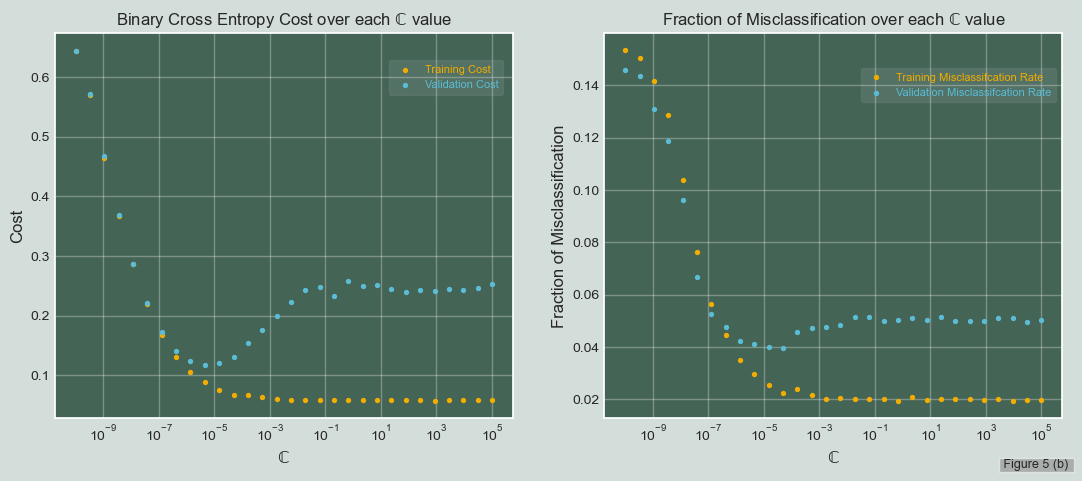

In [287]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(13, 5))
ax1.scatter(C_grid, logis_training_cost_clf, s=8, label='Training Cost', color = '#F2AD00')
ax1.scatter(C_grid, logis_validation_cost_clf, s=8, label='Validation Cost',color = '#5BBCD6')
ax1.legend(loc='upper right')
ax1.set_xscale("log")
ax1.title.set_text('Binary Cross Entropy Cost over each $\BbbC$ value' )
ax1.set_facecolor('#446455')
ax1.tick_params(labelsize=10,direction='in')
ax1.grid(visible=True, which='major', axis='both', alpha = 0.3)
ax1.legend(loc=(0.73, 0.84),labelcolor='linecolor', framealpha=0.1, fontsize=8)
ax2.scatter(C_grid, logis_y_t_frac_clf,s=8,  label='Training Misclassifcation Rate', color = '#F2AD00')
ax2.scatter(C_grid, logis_y_v_frac_clf,s=8,  label='Validation Misclassifcation Rate',color = '#5BBCD6')
ax2.set_xscale("log")
ax2.title.set_text('Fraction of Misclassification over each $\BbbC$ value')
ax2.set_facecolor('#446455')
ax2.tick_params(labelsize=10,direction='in')
ax2.grid(visible=True, which='major', axis='both', alpha = 0.3)
ax2.legend(loc=(0.56, 0.82),labelcolor='linecolor', framealpha=0.1, fontsize=8)
ax1.set_xlabel('$\BbbC$')
ax1.set_ylabel('Cost')
ax2.set_xlabel('$\BbbC$')
ax2.set_ylabel('Fraction of Misclassification')
fig.set_facecolor('#D3DDDA')
plt.figtext(0.88, 0.01, " Figure 5 (b) ", ha="center", fontsize=9, bbox={"facecolor":'#808080', "alpha":0.5, "pad":1})
plt.savefig('Fig 5 (b).png', bbox_inches='tight')
plt.show()

#### Conclusion: 
Here I've presented Figure 5, which is my own impletemention of Hyperparameter $C$. along with 5 (a) my implemention of $\alpha$, and 5 (b) Impletemention of Hyperparameter $C$ with Sklearn logistic regression classifier. 

5 and 5(b) both shows. smaller regularization hyperparameters $C$, will lead to heavy penalization of the model. Fig 5 shows misclassification reach 50%, where the heavy penalization has shrunk all the weights to zero (not equal to zero like L1 norm). Therefore all the model predictions will only result in 1 class, regardless the input, since we have a balanced testing set, leads to 50% of misclassification.
5(b) clearly shows the slip between validation and traning cost. Where high $C$ leads to nearly no regularization on the model, the model may be overfitted. 

5(a) is my impletmentation of hyperparameter $\alpha$. which shows higher $\alpha$ leads to stronger penalization.  $C$ is the inverse of the regularization strength, but $\alpha$ is not. 

#### D8 : Figure 6, the side by side plots by implementing l2 with Sklearn.linear_model.LogisticRegressionCV, by using 10 fold cross-validation. The left plot showing the average value of the cost function for each C value (x-axis), the right plot showing the average misclassifcation (y-axis) for each C value (x-axis), by using a threshold of 0.5.

In [125]:
X_train_cv = train.to_numpy()
y_train_cv = train_L.to_numpy()

In [127]:
clf = LogisticRegressionCV( Cs= C_grid , cv = 10, scoring="neg_log_loss",  penalty='l2', random_state=5508)
clf.fit(X_train_cv,y_train_cv)

C:\cits5508-2024\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\cits5508-2024\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optim

LogisticRegressionCV(Cs=array([1.00000000e-10, 3.29034456e-10, 1.08263673e-09, 3.56224789e-09,
       1.17210230e-08, 3.85662042e-08, 1.26896100e-07, 4.17531894e-07,
       1.37382380e-06, 4.52035366e-06, 1.48735211e-05, 4.89390092e-05,
       1.61026203e-04, 5.29831691e-04, 1.74332882e-03, 5.73615251e-03,
       1.88739182e-02, 6.21016942e-02, 2.04335972e-01, 6.72335754e-01,
       2.21221629e+00, 7.27895384e+00, 2.39502662e+01, 7.88046282e+01,
       2.59294380e+02, 8.53167852e+02, 2.80721620e+03, 9.23670857e+03,
       3.03919538e+04, 1.00000000e+05]),
                     cv=10, random_state=5508, scoring='neg_log_loss')

In [128]:
clf_scores = -clf.scores_[1].mean(axis=0)

In [129]:
clf_accuracy = LogisticRegressionCV( Cs= C_grid, cv = 10,  penalty='l2', random_state=5508)
clf_accuracy.fit(X_train_cv,y_train_cv)

C:\cits5508-2024\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\cits5508-2024\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optim

LogisticRegressionCV(Cs=array([1.00000000e-10, 3.29034456e-10, 1.08263673e-09, 3.56224789e-09,
       1.17210230e-08, 3.85662042e-08, 1.26896100e-07, 4.17531894e-07,
       1.37382380e-06, 4.52035366e-06, 1.48735211e-05, 4.89390092e-05,
       1.61026203e-04, 5.29831691e-04, 1.74332882e-03, 5.73615251e-03,
       1.88739182e-02, 6.21016942e-02, 2.04335972e-01, 6.72335754e-01,
       2.21221629e+00, 7.27895384e+00, 2.39502662e+01, 7.88046282e+01,
       2.59294380e+02, 8.53167852e+02, 2.80721620e+03, 9.23670857e+03,
       3.03919538e+04, 1.00000000e+05]),
                     cv=10, random_state=5508)

In [130]:
clf_misclassfy_score = 1 - clf_accuracy.scores_[1].mean(axis=0)

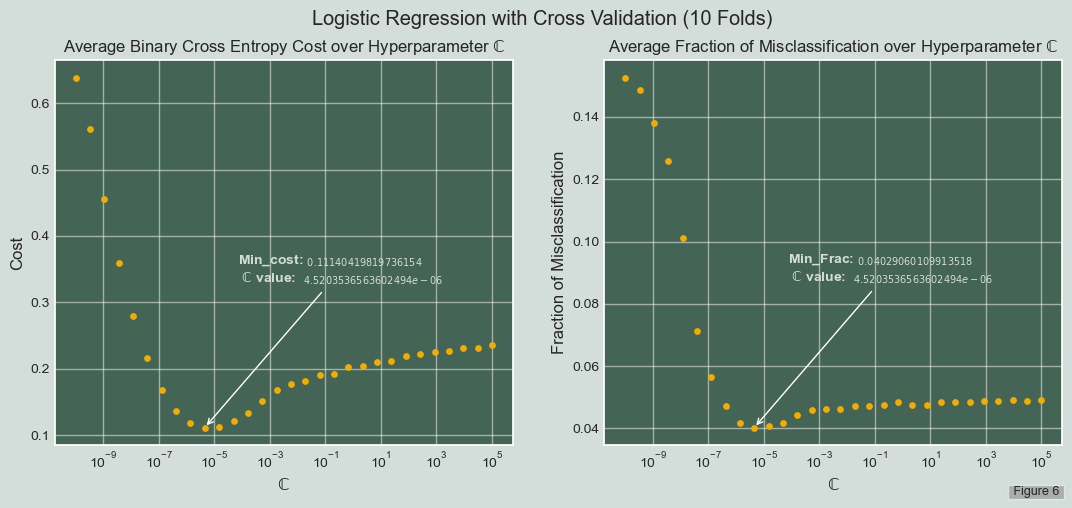

In [290]:
anno_cost_position = np.argmin(clf_scores)
anno_cost_value = np.min(clf_scores)
anno_C = C_grid[anno_cost_position]
anno_frac_position = np.argmin( clf_misclassfy_score)
anno_frac_value = np.min(clf_misclassfy_score)
frac_C = C_grid[anno_frac_position]
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(13, 5))
ax1.scatter(C_grid, clf_scores, s=15, alpha = 1, color = '#F2AD00')
ax1.set_xscale("log")
ax1.title.set_text('Average Binary Cross Entropy Cost over Hyperparameter $\BbbC$')
ax1.annotate(f'Min_cost: $_{{{anno_cost_value}}}$ \n $\BbbC$ value:  $_{{{anno_C}}}$ ', xy=(anno_C, anno_cost_value), xycoords='data',
            xytext=(0.4, .5), textcoords='axes fraction',weight='bold',
            va='top', ha='left',fontsize=10, color='#D3DDDA',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
ax1.grid(visible=True, which='major', axis='both', alpha = 0.5)
ax1.set_facecolor('#446455')
ax1.tick_params(labelsize=10,direction='in')
ax2.scatter(C_grid, clf_misclassfy_score,s=15, alpha = 1, color = '#F2AD00')
# ax2.scatter(C_grid, y_v_frac,s=4, alpha = 0.8, label='Validation Set')
ax2.set_xscale("log")
ax2.title.set_text('Average Fraction of Misclassification over Hyperparameter $\BbbC$')
ax2.annotate(f'Min_Frac: $_{{{anno_frac_value}}}$ \n $\BbbC$ value:  $_{{{frac_C}}}$ ', xy=(frac_C, anno_frac_value), xycoords='data',
            xytext=(0.4, .5), textcoords='axes fraction',weight='bold',
            va='top', ha='left',fontsize=10, color='#D3DDDA',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3"))
ax2.grid(visible=True, which='major', axis='both', alpha = 0.5)
ax2.set_facecolor('#446455')
ax2.tick_params(labelsize=10,direction='in')
fig.set_facecolor('#D3DDDA')
fig.suptitle('Logistic Regression with Cross Validation (10 Folds)')
ax1.set_xlabel('$\BbbC$')
ax1.set_ylabel('Cost')
ax2.set_xlabel('$\BbbC$')
ax2.set_ylabel('Fraction of Misclassification')
plt.figtext(0.88, 0.01, " Figure 6 ", ha="center", fontsize=9, bbox={"facecolor":'#808080', "alpha":0.5, "pad":1})
plt.savefig('Fig 6.png', bbox_inches='tight')
plt.show()

#### D9 : Conclusion :
Comparing with Figure 6 (with cross-validation) and  Figure 5 and 5(b) (without cross-validation) , The optimal C value shifted to a larger value, I would choose the C value after the cross validation as indicated above in the figure 6. 
The cost and misclassification rate is slightly improved. The average of all 10 folds of cross-validations on each C, would yield a better result. 
For the fixed validation set, the C may only be optimal for that particular training - validation split, may not be optimised for generalization.

#### D10 : Using Sklearn.linear_model.SDGClassifier along with SGDClassifier the find the optimal hyperparameter C.
* The SGDClassifer only take hyperparameter $\alpha$, not $C$, therefore I've transformed the $C$_gird into $\alpha$_grid to be comparable.
* Once the algorithm found the optimal $\alpha$, then will transform back to $C$.

In [341]:
No_Train_Instance = X_train_cv.shape[0]
No_Train_Instance

11988

In [135]:
Alpha_grid = 1/(C_grid*No_Train_Instance)

In [140]:
Alpha_grid

array([8.34167501e+05, 2.53519802e+05, 7.70496211e+04, 2.34168853e+04,
       7.11684895e+03, 2.16294945e+03, 6.57362597e+02, 1.99785337e+02,
       6.07186674e+01, 1.84535893e+01, 5.60840635e+00, 1.70450427e+00,
       5.18032150e-01, 1.57440092e-01, 4.78491200e-02, 1.45422825e-02,
       4.41968377e-03, 1.34322825e-03, 4.08233310e-04, 1.24070079e-04,
       3.77073211e-05, 1.14599916e-05, 3.48291536e-06, 1.05852603e-06,
       3.21706742e-07, 9.77729644e-08, 2.97151142e-08, 9.03100379e-09,
       2.74469850e-09, 8.34167501e-10])

In [137]:
param_grid = {
    'alpha': Alpha_grid,     
    'eta0': [ 0.01, 0.001, 0.0001,0.00001],  
}
sgd_clf = SGDClassifier(loss='log_loss',penalty='l2')
grid_search = GridSearchCV(sgd_clf, param_grid, cv=10, scoring='neg_log_loss')
grid_search.fit(X_train_cv,y_train_cv)

GridSearchCV(cv=10, estimator=SGDClassifier(loss='log_loss'),
             param_grid={'alpha': array([8.34167501e+05, 2.53519802e+05, 7.70496211e+04, 2.34168853e+04,
       7.11684895e+03, 2.16294945e+03, 6.57362597e+02, 1.99785337e+02,
       6.07186674e+01, 1.84535893e+01, 5.60840635e+00, 1.70450427e+00,
       5.18032150e-01, 1.57440092e-01, 4.78491200e-02, 1.45422825e-02,
       4.41968377e-03, 1.34322825e-03, 4.08233310e-04, 1.24070079e-04,
       3.77073211e-05, 1.14599916e-05, 3.48291536e-06, 1.05852603e-06,
       3.21706742e-07, 9.77729644e-08, 2.97151142e-08, 9.03100379e-09,
       2.74469850e-09, 8.34167501e-10]),
                         'eta0': [0.01, 0.001, 0.0001, 1e-05]},
             scoring='neg_log_loss')

In [139]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print("Best Parameters:", best_params)
print("best_score:", best_score)

Best Parameters: {'alpha': 18.453589348268654, 'eta0': 1e-05}
best_score: -0.12469395668106435


#### D10 : Using Sklearn.linear_model.SDGClassifier along with SGDClassifier the find the optimal hyperparameter C.
* The optimal $\alpha$ and learning rate results according to GridSearch has been listed as above
* Below step is to transforming this optimal $\alpha$ back to $C$, the result here according to grid search, is exactly the same with the result in Figure 6, the optimal $C$ from the Logistic Regression CV.

In [145]:
C_from_optimal_Alpha = []
C_from_optimal_Alpha.append( 1 / (grid_search.best_params_["alpha"] *No_Train_Instance) )
C_from_optimal_Alpha

[4.520353656360249e-06]

* Below shows the value of the cost function in the training set for this optimal value

In [146]:
grid_search.predict_proba(X_train)

array([[9.99802152e-01, 1.97847980e-04],
       [7.75160730e-01, 2.24839270e-01],
       [9.99518715e-01, 4.81284735e-04],
       ...,
       [1.84114318e-02, 9.81588568e-01],
       [9.87348860e-01, 1.26511402e-02],
       [9.98621060e-01, 1.37893964e-03]])

In [147]:
Cost_of_optimal_training = -grid_search.score(X_train,y_train)
Cost_of_optimal_training

0.09656777383905067

In [148]:
#same with above just different way to calculate
log_loss(y_train, grid_search.predict_proba(X_train))

0.09656777383905067

* Below shows the value of the cost function in the validation set for this optimal value

In [149]:
Cost_of_optimal_validation = -grid_search.score(X_val,y_val)
Cost_of_optimal_validation

0.10285665156767708

* Below shows the fraction of misclassifications in the training set.

In [150]:
frac_mis_optimal_train = np.mean(grid_search.predict(X_train)  != y_train)
frac_mis_optimal_train

0.034932221063607924

* Below shows the fraction of misclassifications in the validation set.

In [151]:
frac_mis_optimal_val = np.mean(grid_search.predict(X_val)  != y_val)
frac_mis_optimal_val

0.03544620517097581

#### D11 : Conclusion.

Compare with D8, the grid search has returned an exact same optimal C value, along with optimal learning rate. 
Both the cost on validation set have improved slightly. 
The grid search has yield the best performance on the validation set in all the previous attempts.

#### **Extra attempt. 
Below is another of my own extra attempt, instead of using SGDclassifer with GridSearchCV to find the optimal $Alpha$ rather than $C$, here I've used logisticregression classifer with grid search, in order to find the optimal C directly from orginal C_gird. It has again found the same optimal C directly. However as LogisticRegression is not using gradient descent, hence no learning rate needed.
* The scoring here below is accuracy here, hence it is different from above where the best score is the neg log cost score.

In [152]:
param_grid_logis = {
    'C': C_grid
}
logis = LogisticRegression()
#using LogisticRegression, combining with grid search to find the optimal hyper parameters.
grid_search_Logis = GridSearchCV(logis, param_grid_logis, cv=10)
grid_search_Logis.fit(X_train_cv,y_train_cv)

C:\cits5508-2024\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\cits5508-2024\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optim

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-10, 3.29034456e-10, 1.08263673e-09, 3.56224789e-09,
       1.17210230e-08, 3.85662042e-08, 1.26896100e-07, 4.17531894e-07,
       1.37382380e-06, 4.52035366e-06, 1.48735211e-05, 4.89390092e-05,
       1.61026203e-04, 5.29831691e-04, 1.74332882e-03, 5.73615251e-03,
       1.88739182e-02, 6.21016942e-02, 2.04335972e-01, 6.72335754e-01,
       2.21221629e+00, 7.27895384e+00, 2.39502662e+01, 7.88046282e+01,
       2.59294380e+02, 8.53167852e+02, 2.80721620e+03, 9.23670857e+03,
       3.03919538e+04, 1.00000000e+05])})

In [154]:
best_params_logis = grid_search_Logis.best_params_
best_score_logis = grid_search_Logis.best_score_
print("Best Parameters:", best_params_logis)
print("best_score:", best_score_logis)

Best Parameters: {'C': 4.5203536563602494e-06}
best_score: 0.9565399519076137


#### D12:

In [156]:
clf_optimal = LogisticRegressionCV( Cs= C_from_optimal_Alpha , cv = 10, max_iter = 500, penalty='l2')
clf_optimal.fit(X_train,y_train)

LogisticRegressionCV(Cs=[4.520353656360249e-06], cv=10, max_iter=500)

In [157]:
y_val_proba = clf_optimal.predict_proba(X_val)[:,1]
y_val_proba

array([0.98924503, 0.30294294, 0.94193273, ..., 0.99278939, 0.00147713,
       0.00103239])

In [158]:
precision_1, recall_1, threshold_1 = precision_recall_curve(y_val, y_val_proba)  

#### D12: Figure 7 shows the Pecision Vs Recall for different threshold values

In [159]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    fig, ax = plt.subplots(figsize=(7.5,5), facecolor='#D3DDDA')
    ax.title.set_text('Precision vs Recall Curve')
    ax.set_facecolor('#446455')
    ax.plot(thresholds, precisions[:-1], "--", label="Precision", color = "#F2AD00",linewidth=2)
    ax.plot(thresholds, recalls[:-1], "-", label="Recall", color = "#5BBCD6", linewidth=2)
    ax.axvline(x = 0.5, color = '#FD6467', alpha = 0.7, label = '0.5 Threshold')
    ax.legend(loc=(0.05, 0.05),labelcolor='linecolor', framealpha=0, fontsize=9) 
    ax.set_xlabel("Threshold")      
    ax.grid(visible=True, which='major', axis='both', alpha = 0.3)
    ax.tick_params(labelsize=10,direction='in')
    ax.axis([-0.05,1.05, 0, 1.01])

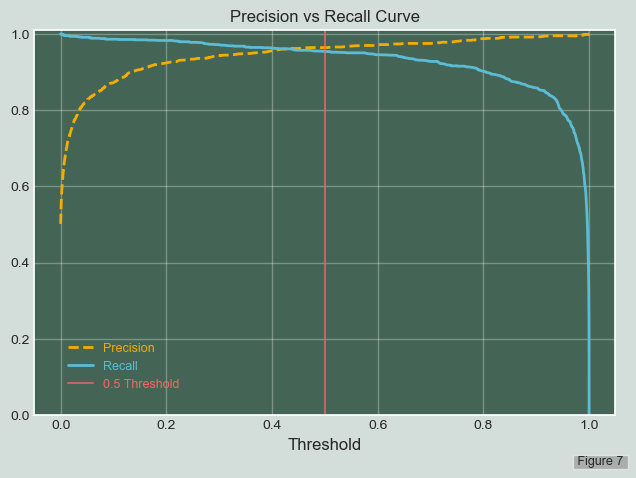

In [291]:
plot_precision_recall_vs_threshold(precision_1, recall_1, threshold_1)
plt.figtext(0.88, 0.01, " Figure 7 ", ha="center", fontsize=9, bbox={"facecolor":'#808080', "alpha":0.5, "pad":1})
plt.savefig('Fig 7.png', bbox_inches='tight')

#### D12: Comments :
As we can see, when threshold is 0, the model predict all the instances as Sandals (Class 1). Therefore the recall is 1, It has predicted all the true Sandals as Sandales, where precision is 50%, as our relatively balanced dataset, all the Sneakers got predicted incorrectly.
Similarily when threshold is approching to 1, the model predict has no false positive prediction , hence precision is 1, but false negative would be very high. 

The red line indicates a 0.5 standard threshold, the figure shows if we choose 0.5, we could have higher precision than recall, meaning more false negetive, less false positive, If model return the predicted class as 1 Sandales, less likely it is incorrect. But if model predict class as 0 Sneakers, more likely it should be Sandales instead.

I would choose a threshold between 0.4 and 0.5 to reach a balance of predicting both class correcly, no bias to Sandals or Sneakers.

#### D13: Here I am using F score as a measurement to find the optimal threshold for precision and recall.

In [186]:
fscore = (2*precision_1*recall_1)/(precision_1 + recall_1)


In [193]:
#index of the best fscore in the calculated fscore list from above
ix = np.argmax(fscore)

In [189]:
print('Best Threshold=%f, F-Score=%.3f' % (threshold_1[ix], fscore[ix]))

Best Threshold=0.428190, F-Score=0.961


In [190]:
matches_idx = []
for index in range(len(precision_1)):
    if precision_1[index] == recall_1[index]:
        matches_idx.append(index)
print (matches_idx)

[1196]


In [658]:
threshold_1[matches_idx], fscore[matches_idx]

(array([0.42779265]), array([0.9608985]))

In [659]:
precision_1[matches_idx]

array([0.9608985])

In [660]:
recall_1[matches_idx]

array([0.9608985])

#### Conclusion : Optimal threshhold is 0.42779265, with Fscore at 0.9608985. 

#### 4.4

In [195]:
test_x = test.to_numpy()

In [196]:
test_y = test_L.to_numpy()

In [ ]:
#4. :  model_3   clf_accuracy    clf_optimal    clf_optimalI(wiht threshold)

In [197]:
LR1_pred = model_3.predict(test_x, threshold=0.5)

In [198]:
LR2_pred = clf_accuracy.predict(test_x)

In [199]:
LR3_pred = clf_optimal.predict(test_x)

In [200]:
LR4_predict_proba = clf_accuracy.predict_proba(test_x)[:,1]
LR4_predict_proba

array([0.94142596, 0.01084393, 0.98904508, ..., 0.99999747, 1.        ,
       0.9925174 ])

In [201]:
threshold_1[ix]

0.42818973019477014

In [202]:
LR4_pred = np.where(LR4_predict_proba>threshold_1[ix], 1, 0)

In [203]:
LR1_cm = confusion_matrix(test_y, LR1_pred)

In [204]:
LR2_cm = confusion_matrix(test_y, LR2_pred)

In [205]:
LR3_cm = confusion_matrix(test_y, LR3_pred)

In [206]:
LR4_cm = confusion_matrix(test_y, LR4_pred)

#### D14. The Figure 8 shows the confustion for all LR1 to LR4 models, with prediction/truth, and class label clearly stated.

In [221]:
def cm_labels(LR):
    group_names = ['TN','FP','FN','TP']
    group_counts = ['{0:0.0f}'.format(value) for value in LR.flatten()]
    #group_percentages = ['{0:.2%}'.format(value) for value in LR.flatten()/np.sum(LR)]
    labels = [f'{v2}: {v1}' for v1, v2 in zip(group_counts,group_names)]
    labels = np.asarray(labels).reshape(2,2)
    return labels

In [222]:
label_1 = cm_labels(LR1_cm)
label_2 = cm_labels(LR2_cm)
label_3 = cm_labels(LR3_cm)
label_4 = cm_labels(LR4_cm)


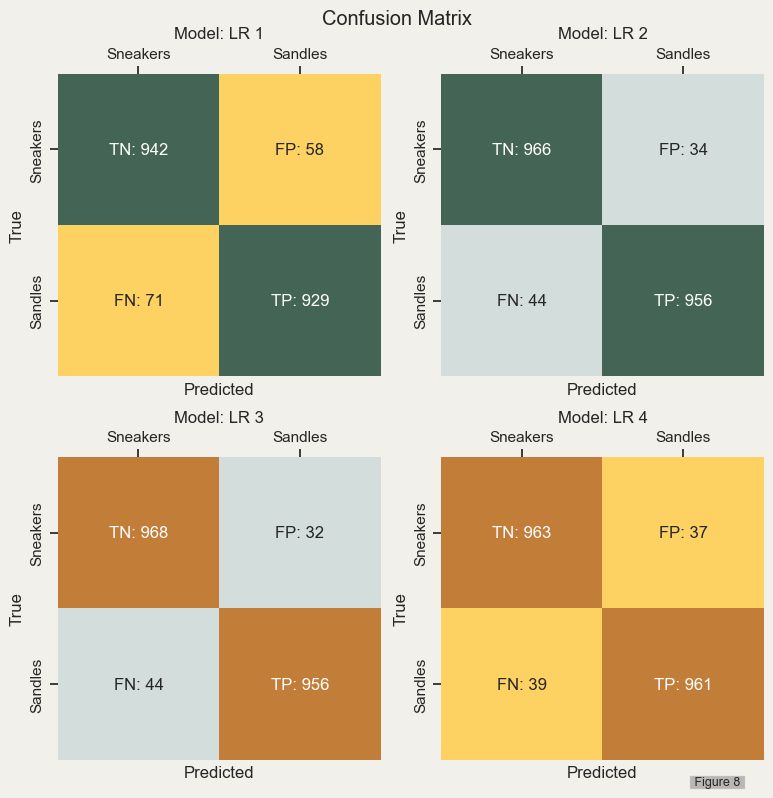

In [292]:
fig, ax= plt.subplots(2, 2 ,figsize=(8, 8))
g1 = sns.heatmap(LR1_cm, annot=label_1, fmt='', cmap=['#FDD262','#446455'], cbar=False, ax=ax[0,0])
g1.xaxis.set_ticklabels(['Sneakers', 'Sandles'])
g1.yaxis.set_ticklabels(['Sneakers', 'Sandles'])
g2 = sns.heatmap(LR2_cm, annot=label_2, fmt='', cmap=['#D3DDDC','#446455'], cbar=False, ax=ax[0,1])
g2.xaxis.set_ticklabels(['Sneakers', 'Sandles'])
g2.yaxis.set_ticklabels(['Sneakers', 'Sandles'])
g3 = sns.heatmap(LR3_cm, annot=label_3, fmt='', cmap=['#D3DDDC',"#C27D38"], cbar=False, ax=ax[1,0])
g3.xaxis.set_ticklabels(['Sneakers', 'Sandles'])
g3.yaxis.set_ticklabels(['Sneakers', 'Sandles'])
g4 = sns.heatmap(LR4_cm, annot=label_4, fmt='', cmap=['#FDD262',"#C27D38"], cbar=False, ax=ax[1,1])
g4.xaxis.set_ticklabels(['Sneakers', 'Sandles'])
g4.yaxis.set_ticklabels(['Sneakers', 'Sandles'])
for i, a in enumerate(ax.flat):
    a.set_title(f'Model: LR {i+1}')
    a.xaxis.tick_top()
    a.yaxis.tick_left()
fig.tight_layout(pad=2.0)
fig.set_facecolor('#f1f0eb')
plt.setp(ax, xlabel='Predicted')
plt.setp(ax, ylabel='True')
fig.suptitle('Confusion Matrix')
plt.figtext(0.9, 0.01, " Figure 8 ", ha="center", fontsize=9, bbox={"facecolor":'#808080', "alpha":0.5, "pad":1})
plt.savefig('Fig 8.png', bbox_inches='tight')
plt.show()

#### D14. Below calculate precision recall and false positive rate

In [232]:
precision_score(test_y, LR1_pred)

0.9412360688956434

In [233]:
recall_score (test_y, LR1_pred)

0.929

In [234]:
LR1_cm[1,0]/(LR1_cm[1,0]+LR1_cm[1,1])

0.071

In [235]:
precision_score(test_y, LR2_pred)

0.9656565656565657

In [236]:
recall_score (test_y, LR2_pred)

0.956

In [237]:
LR2_cm[1,0]/(LR2_cm[1,0]+LR2_cm[1,1])

0.044

In [238]:
precision_score(test_y, LR3_pred)

0.9676113360323887

In [239]:
recall_score (test_y, LR3_pred)

0.956

In [240]:
LR3_cm[1,0]/(LR3_cm[1,0]+LR3_cm[1,1])

0.044

In [241]:
precision_score(test_y, LR4_pred)

0.9629258517034068

In [242]:
recall_score (test_y, LR4_pred)

0.961

In [243]:
LR4_cm[1,0]/(LR4_cm[1,0]+LR4_cm[1,1])

0.039

####  D15. Conclusion:

From above table and figure 8 Confusion matrix, we can see the LR1 model without penalisation generalize the worst. 
Both LR2, and LR3 are quite similar with L2 norm penalisation, it has improved the model.
The LR4 has better balanced result. based on the best F1 score to pick the optimal threshold. 

#### D16. Based on model LR4, showing five images that are false positives on the test set adn five images that are false negatives.

In [210]:
misclassified = np.where(test_y != LR4_pred)

In [211]:
final_list = misclassified[0].tolist()

In [252]:
np.where(test_y[misclassified]==0)[0]

array([ 0,  1,  2,  6,  8,  9, 12, 14, 19, 21, 22, 23, 24, 26, 28, 29, 31,
       33, 35, 39, 40, 41, 42, 47, 48, 54, 55, 57, 58, 61, 62, 63, 64, 67,
       70, 72, 73], dtype=int64)

In [212]:
select_list_true_sneakers = np.where(test_y[misclassified]==0)[0].tolist()
select_list_true_sandels = np.where(test_y[misclassified]==1)[0].tolist()

In [213]:
FP_images_idx = [final_list[i] for i in select_list_true_sneakers][:5]
FP_images_idx

[3, 56, 113, 167, 199]

In [214]:
FN_images_idx = [final_list[i] for i in select_list_true_sandels][:5]
FN_images_idx

[120, 149, 163, 171, 289]

In [215]:
FP_image_pixel_list = [test_x[i] for i in FP_images_idx]

In [216]:
FN_image_pixel_list = [test_x[i] for i in FN_images_idx]

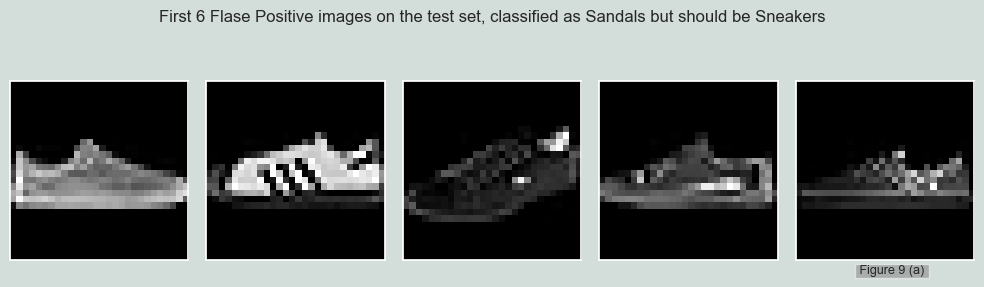

In [293]:
fig, axs = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(FP_image_pixel_list[i].reshape(28,28),interpolation = 'nearest',cmap='gray')
    #ax.set_title(f'example {D3_list[i]}, y={image[i][0]}', fontsize=10)
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
fig.suptitle('First 6 Flase Positive images on the test set, classified as Sandals but should be Sneakers', fontsize=12)
plt.tight_layout()
fig.set_facecolor('#D3DDDA')
plt.figtext(0.9, 0.1, " Figure 9 (a) ", ha="center", fontsize=9, bbox={"facecolor":'#808080', "alpha":0.5, "pad":1})
plt.savefig('Fig 9 (a).png', bbox_inches='tight')
plt.show()

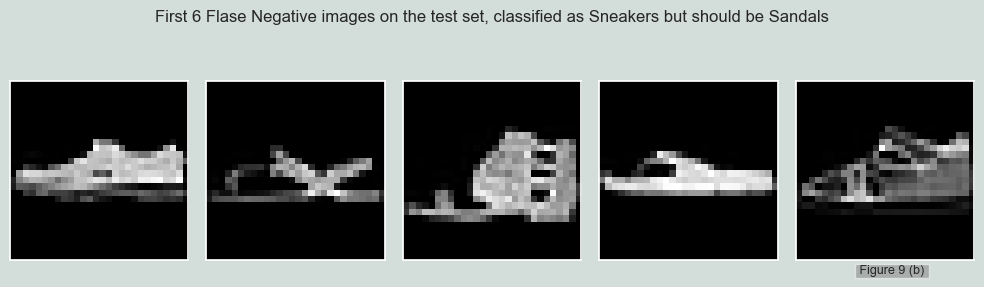

In [303]:
fig, axs = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(FN_image_pixel_list[i].reshape(28,28),interpolation = 'nearest',cmap='gray')
    #ax.set_title(f'example {D3_list[i]}, y={image[i][0]}', fontsize=10)
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
fig.suptitle('First 6 Flase Negative images on the test set, classified as Sneakers but should be Sandals', fontsize=12)
plt.tight_layout()
fig.set_facecolor('#D3DDDA')
plt.figtext(0.9, 0.1, " Figure 9 (b) ", ha="center", fontsize=9, bbox={"facecolor":'#808080', "alpha":0.5, "pad":1})
plt.savefig('Fig 9 (b).png', bbox_inches='tight')
plt.show()

#### Conclusion:

The first 6 False Positive images shows quite uniformed pixels, where model may not able to disdinguish the class. The pixels have very low contract, however the addidas sneakers maybe falsely classified as sandale straps.
The second 6 False Negative images shows quite clustered pixels, where may more looks like sneakers rather than sandales. Even with humen eyes it is a bit hard to tell a definite answer.

#### D18

In [219]:
clf_optimal.coef_[0,:]

array([ 0.00000000e+00,  2.92282490e-11,  2.92282490e-11,  9.54100863e-11,
        7.42741248e-06,  7.42710538e-06,  7.43140874e-06,  8.08777319e-06,
        7.42746783e-06,  9.74799412e-06,  6.81489162e-05,  4.30736284e-05,
        1.52023968e-04,  2.55834043e-04,  1.28924773e-04,  1.57000972e-04,
        3.34967672e-04,  6.79973442e-04,  5.49874951e-04,  6.00468790e-04,
        3.01702092e-04,  3.22485204e-04,  1.59795999e-04,  1.65139084e-04,
        6.55507209e-05,  2.51743195e-05,  3.79114585e-06,  1.08936712e-09,
        0.00000000e+00,  2.92282490e-11,  2.92282490e-11,  9.54100863e-11,
        7.42719254e-06,  7.52426703e-06,  2.14475097e-05,  1.08530437e-05,
        8.01554009e-06,  1.01269261e-05,  6.45348780e-05,  1.95824552e-04,
        1.01357313e-04,  4.44151502e-04,  4.08262533e-04,  5.88045768e-04,
        1.21186849e-03,  9.22167779e-04,  9.18110300e-04,  8.99054616e-04,
        1.10064967e-03,  9.02689912e-04,  5.12016241e-04,  3.99585971e-04,
        1.92108422e-04, -

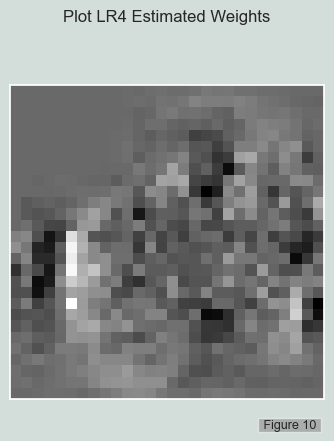

In [324]:
fig, ax = plt.subplots()
fig.set_size_inches(3.5, 4.5)
ax.imshow(clf_optimal.coef_[0,:].reshape(28,28),interpolation = 'nearest',cmap='gray')
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
fig.suptitle('Plot LR4 Estimated Weights', fontsize=12)
plt.tight_layout()
fig.set_facecolor('#D3DDDA')
plt.figtext(0.85, 0.05, " Figure 10 ", ha="center", fontsize=9, bbox={"facecolor":'#808080', "alpha":0.5, "pad":1})
plt.savefig('Fig 10.png', bbox_inches='tight')
plt.show()

#### D19. 
The model LR4 has stronger weights around the front of the shoes, possibly if the shoes with enclosed front it may be a good indication to be sneakers, rather than sandals where it is more likely to be open at front.
The model tends to detect the edge of the shape, rather than inner side.



#### D20

In [265]:
knn_clf = KNeighborsClassifier(n_neighbors = 10, metric = 'euclidean' )

In [266]:
knn_clf.fit(X_train,y_train)               

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [267]:
K = list(range(1,31))

In [268]:
frac_mis_t = []
frac_mis_v = []
for k in range(1,31):
    knn_clf = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean' )
    knn_clf.fit(X_train,y_train)
    frac_mis_t.append(np.mean (knn_clf.predict(X_train) != y_train))
    frac_mis_v.append(np.mean (knn_clf.predict(X_val) != y_val))

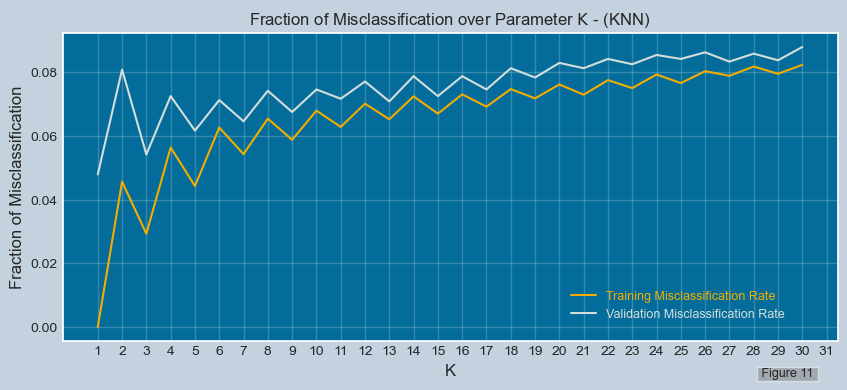

In [355]:

fig, ax1 = plt.subplots(1, 1,figsize=(10,4))
ax1.plot(K, frac_mis_t, alpha = 1, color = '#F2AD00',label='Training Misclassification Rate')
ax1.plot(K, frac_mis_v, alpha = 1, color = '#D3DDDA',label='Validation Misclassification Rate')
ax1.title.set_text('Fraction of Misclassification over Parameter $\u039A$ - (KNN)')
ax1.grid(visible=True, which='major', axis='both', alpha = 0.2)
ax1.set_facecolor('#046C9A')
ax1.tick_params(labelsize=10,direction='in')
ax1.set_xticks(np.arange(1,32,1))
fig.set_facecolor('#c4d2df')
# fig.suptitle('Logistic Regression with Cross Validation')
ax1.set_xlabel('\u039A')
ax1.set_ylabel('Fraction of Misclassification')
ax1.legend(loc=(0.65, 0.05),labelcolor='linecolor', framealpha=0, fontsize=9) 
plt.figtext(0.85, 0.02, " Figure 11 ", ha="center", fontsize=9, bbox={"facecolor":'#808080', "alpha":0.5, "pad":1})
plt.savefig('Fig 11.png', bbox_inches='tight')
plt.show()

#### D21
with the increase of the K, the model misclassification rate increases accordingly.
It is really interesting to see the model perform better on the K being an odd number, compared to even number K.

It is usually not recommended the choose K = 1 due to the high likelihood being overfitting, but based on this training and validation set, K=1 perform the best on the validation set.  Comparing with the logistic regression in section 4.2, KNN perform also quite will with the mis classification rate being around 0.05. like the logistic regression. 


#### D22

In [271]:
knn_clf_optimal = KNeighborsClassifier(n_neighbors = 1, metric = 'euclidean' )
knn_clf_optimal.fit(X_train_cv,y_train_cv)
 

KNeighborsClassifier(metric='euclidean', n_neighbors=1)

In [272]:
LR_K_pred = knn_clf_optimal.predict(test_x)

In [273]:
LR_K_cm = confusion_matrix(test_y, LR_K_pred)

In [274]:
label_K = cm_labels(LR_K_cm)

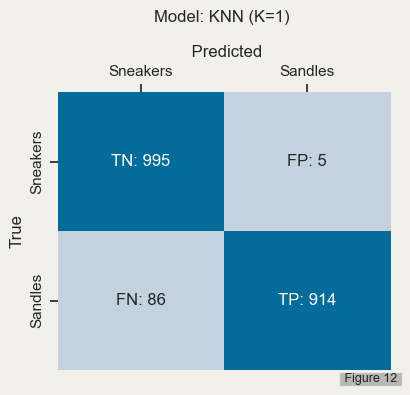

In [350]:
fig, ax= plt.subplots(1, 1 ,figsize=(4, 4))
g1 = sns.heatmap(LR_K_cm, annot=label_K, fmt='', cmap=['#c4d2df','#046C9A'], cbar=False)
g1.xaxis.set_ticklabels(['Sneakers', 'Sandles'])
g1.yaxis.set_ticklabels(['Sneakers', 'Sandles'])
g1.set_title(f'Model: KNN (K=1) \n \n Predicted')
g1.xaxis.tick_top()
g1.yaxis.tick_left()
fig.tight_layout(pad=1.2)
fig.set_facecolor('#f1f0eb')
#plt.setp(ax, xlabel='Predicted')
plt.setp(ax, ylabel='True')
plt.figtext(0.9, 0.02, " Figure 12 ", ha="center", fontsize=9, bbox={"facecolor":'#808080', "alpha":0.5, "pad":1})
plt.savefig('Fig 12.png', bbox_inches='tight')
plt.show()

In [1669]:
precision_score(test_y, LR_K_pred)

0.9945593035908596

In [1672]:
recall_score (test_y, LR_K_pred)

0.914

In [1668]:
LR_K_cm[1,0]/(LR_K_cm[1,0]+LR_K_cm[1,1])

0.086

#### D23: 

If our goal is precision score, which is, detect the true Sandals correctly but don’t mind other classes being incorrectly classified as Sandals, then KNN is a great model for this purpose, as it is reaching highest 0.9946 accuracy score.

However if we wish to have no bias on detect different classes, where all classes should be detected correctly, then LR 4, logistic regression with optimal penalization and optimal threshold for Fscore, will lead us to the least misclassification rate.


#### D24:  
Here in this task, we’ve got given all the dataset, with explicit instruction to train and model, and interpreting the result.
There are a few things we could do to further improve the model.

-	Feature scaling. 
This a quite a crucial step for many ML algorithms, especially the distance based algorithms like KNN, as well as the penalization models, where a constant value has been multiplied to the weight vector.
If there are vast differences in the scales in different feature, eg. Age vs population . Then these scale differences will influence the model differently, where larger scale feature may have more influence.

However in our dataset, all features are representations of the grey scale of a pixel, which within the same range. Then it is still acceptable to perform model algorithms without feature scaling. Plus if all feature scaled to -1 to 1, the deliverable of D4 with learning rate to be 10-5 may be too slow for the model. And the subsequential plot may not be meaningful.
After some experiment, if the features are scaled, the model will perform a bit better, but not vastly different. 

-	Feature reduction/selection
This is another important step to build a successful model.  Maybe the ‘white border pixel’ outside every image are all 0 in our dataset, these may be not so useful and provide meaning information, can therefore been disregard.

Commonly for image data, it is also recommended to use ‘max pooling’ etc techniques, transform and reduce the number of features for the model. Or even increasing the size of the dataset through rotation/flipping, may also help. 
The edge/outline of an image may be quite important for classification/categorization. 

-	Balanced data
This is also important for classification, as imbalanced data may cause some assumption on a good model but in fact is not. However, in our case, we have a perfectly balanced dataset.

-	Lots of other skills including cross validation, hyper parameter tuning etc have been applied in our case. 
